In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.spatial.distance import cosine
import random
from random import randint

In [7]:
params = {'figure.figsize': (15, 5),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
          'axes.titlesize': 18}
pylab.rcParams.update(params)

In [12]:
allstocks = pd.read_csv(r'Desktop/FSP_CW/FSP_Code_cks116/Section 1/data/snp_allstocks_2015_2019.csv',index_col='Date')
info = pd.read_csv(r'Desktop/FSP_CW/FSP_Code_cks116/Section 1/data/snp_info.csv')
info.drop(columns=info.columns[0],inplace=True)
info = info.sort_values(by ='GICS Sector')
logret = (np.log(allstocks)).diff()

FileNotFoundError: [Errno 2] File Desktop/FSP_CW/FSP_Code_cks116/Section 1/data/snp_allstocks_2015_2019.csv does not exist: 'Desktop/FSP_CW/FSP_Code_cks116/Section 1/data/snp_allstocks_2015_2019.csv'

In [4]:
random.seed(10)
sector = 'Financials'
tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].iloc[random.sample(range(0, 67), 10)]

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
allstocks[tickers].plot(ax=ax1,title='Financials: 10 stocks (raw prices)',grid=True)
ax1.set_ylabel('Price')
logret[tickers].plot(ax=ax2,title='Financials: 10 stocks (log returns)',grid=True)
ax2.set_ylabel('Log returns')
#plt.savefig('/Users/desmond/Desktop/FSP_CW/all/Section 5/eps_files/financials.eps')

NameError: name 'info' is not defined

In [6]:
corr_thresh = 0.7
corr = logret[tickers].corr()
links = corr.stack().reset_index()
links.columns = ['stock1', 'stock2','corr']
links_filtered=links.loc[(links['corr'] > corr_thresh) & (links['stock1'] != links['stock2'])]

plt.figure(figsize=(6,5))
G=nx.from_pandas_edgelist(links_filtered, 'stock1', 'stock2')
nx.draw(G, with_labels=True, node_color='orange', node_size=800, edge_color='black', linewidths=1, font_size=10)
#plt.savefig('/Users/desmond/Desktop/FSP_CW/all/Section 5/eps_files/corrgraph.eps')

NameError: name 'logret' is not defined

In [7]:
corr

NameError: name 'corr' is not defined

# 5.3

In [8]:
shuffled = logret[tickers].dropna().sample(frac=1, random_state=1).reset_index(drop=True)
corr_thresh = 0.7
corr = shuffled.corr()
links = corr.stack().reset_index()
links.columns = ['stock1', 'stock2','corr']
links_filtered=links.loc[(links['corr'] > corr_thresh) & (links['stock1'] != links['stock2'])]

plt.figure(figsize=(6,5))
G=nx.from_pandas_edgelist(links_filtered, 'stock1', 'stock2')
nx.draw(G, with_labels=True, node_color='orange', node_size=800, edge_color='black', linewidths=1, font_size=10)
#plt.savefig('/Users/desmond/Desktop/FSP_CW/all/Section 5/eps_files/reordered.eps')

NameError: name 'logret' is not defined

In [9]:
corr

NameError: name 'corr' is not defined

# 5.4

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


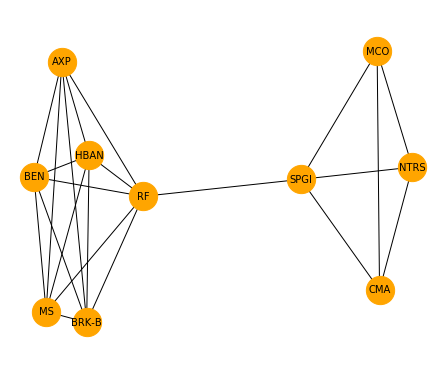

In [469]:
ret_fft = np.zeros((len(tickers),len(tickers)))
for i in range(len(tickers)):
    ret_fft[i,:] = np.fft.fft(logret[tickers].dropna().iloc[i,:]) #compute fft

ret_fft = pd.DataFrame(data=ret_fft,columns=tickers,index=tickers)

spect_dist = pd.DataFrame(columns=tickers.values,index=tickers.values)
for i in range(len(tickers)):
    for n in range(len(tickers)):
        spect_dist.iloc[i,n] = np.linalg.norm(ret_fft.iloc[i] - ret_fft.iloc[n]) #compute spectral distance
        
#plot graph
corr_thresh = 0.2
links = spect_dist.stack().reset_index()
links.columns = ['stock1', 'stock2','corr']
links_filtered=links.loc[(links['corr'] < corr_thresh) & (links['stock1'] != links['stock2'])]

plt.figure(figsize=(6,5))
G=nx.from_pandas_edgelist(links_filtered, 'stock1', 'stock2')
nx.draw(G, with_labels=True, node_color='orange', node_size=800, edge_color='black', linewidths=1, font_size=10)
#plt.savefig('/Users/desmond/Desktop/FSP_CW/all/Section 5/eps_files/54.eps')

# spectral with reordering

In [2]:
ret_fft = np.zeros((len(tickers),len(tickers)))
for i in range(len(tickers)):
    ret_fft[i,:] = np.fft.fft(shuffled.dropna().iloc[i,:])

ret_fft = pd.DataFrame(data=ret_fft,columns=tickers,index=tickers)

spect_dist = pd.DataFrame(columns=tickers.values,index=tickers.values)
for i in range(len(tickers)):
    for n in range(len(tickers)):
        spect_dist.iloc[i,n] = np.linalg.norm(ret_fft.iloc[i] - ret_fft.iloc[n])
        
corr_thresh = 0.05
links = spect_dist.stack().reset_index()
links.columns = ['stock1', 'stock2','corr']
links_filtered=links.loc[(links['corr'] < corr_thresh) & (links['stock1'] != links['stock2'])]

plt.figure(figsize=(6,5))
G=nx.from_pandas_edgelist(links_filtered, 'stock1', 'stock2')
nx.draw(G, with_labels=True, node_color='orange', node_size=800, edge_color='black', linewidths=1, font_size=10)
#plt.savefig('/Users/desmond/Desktop/FSP_CW/all/Section 5/eps_files/54shuffled.eps')

NameError: name 'np' is not defined

# 5.5

In [1]:
corr_thresh = 0.7
corr = allstocks[tickers].corr()
links = corr.stack().reset_index()
links.columns = ['stock1', 'stock2','corr']
links_filtered=links.loc[(links['corr'] > corr_thresh) & (links['stock1'] != links['stock2'])]

plt.figure(figsize=(7,5))
G=nx.from_pandas_edgelist(links_filtered, 'stock1', 'stock2')
nx.draw(G, with_labels=True, node_color='orange', node_size=800, edge_color='black', linewidths=1, font_size=10)
#plt.savefig('/Users/desmond/Desktop/FSP_CW/all/Section 5/eps_files/rawprices.eps')

NameError: name 'allstocks' is not defined

In [289]:
corr

,HBAN,BRK-B,CMA,MCO,BEN,AXP,SPGI,MS,RF,NTRS
HBAN,1.000000,0.899359,0.965112,0.873734,-0.151160,0.868741,0.872249,0.947844,0.974076,0.973168
BRK-B,0.899359,1.000000,0.944343,0.915740,-0.311736,0.891725,0.945038,0.856135,0.941461,0.918345
CMA,0.965112,0.944343,1.000000,0.927698,-0.273437,0.856647,0.950135,0.933288,0.995576,0.985824
MCO,0.873734,0.915740,0.927698,1.000000,-0.346642,0.885922,0.974046,0.838768,0.911528,0.915527
BEN,-0.151160,-0.311736,-0.273437,-0.346642,1.000000,-0.085244,-0.415324,0.027770,-0.278109,-0.233081
AXP,0.868741,0.891725,0.856647,0.885922,-0.085244,1.000000,0.845002,0.856276,0.852628,0.854321
SPGI,0.872249,0.945038,0.950135,0.974046,-0.415324,0.845002,1.000000,0.825941,0.934562,0.927322
MS,0.947844,0.856135,0.933288,0.838768,0.027770,0.856276,0.825941,1.000000,0.933286,0.931933
RF,0.974076,0.941461,0.995576,0.911528,-0.278109,0.852628,0.934562,0.933286,1.000000,0.982237
NTRS,0.973168,0.918345,0.985824,0.915527,-0.233081,0.854321,0.927322,0.931933,0.982237,1.000000
